In [24]:
%matplotlib inline
from pylab import *

In [25]:
from classy import *

In [26]:
data_train=double_moon_data(d=-2,N=1000)
data_test=double_moon_data(d=-2,N=200)

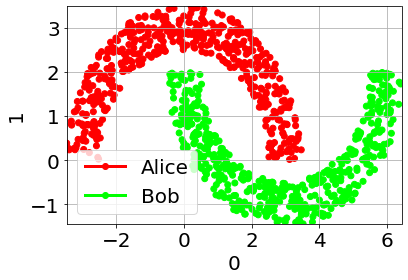

In [27]:
plot2D(data_train)

## no hidden layer, linear units = Perceptron

In [28]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'output':(2,'linear'),  # number of classes
    'cost':'mse',
})

# activation functions - linear, tanh (-1 to 1), logistic (0 to 1), relu (min 0, linear)

In [29]:
C.fit(data_train.vectors,data_train.targets,epochs=3000)

layer       filters  size              input                output
   0 input                  1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2
   1 connected              1000 x   1 x   1 x   2   ->  1000 x   2
   2 cost                   1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2


100%|██████████████████████████████████████████████████████████| 3000/3000 [00:03<00:00, 968.81it/s]


In [30]:
print((C.predict(data_test.vectors)))
print(("On Train`ing Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0
 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
('On Train`ing Set:', 86.1)
('On Test Set:', 85.0)


In [31]:
C.weights

[array([[-0.06578985,  0.06557728],
        [ 0.21598994, -0.2165912 ]])]

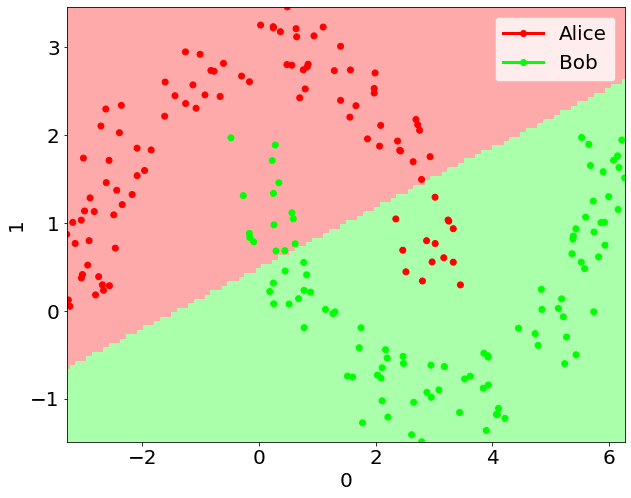

In [9]:
plot2D(data_test,classifier=C)

In [32]:
data=load_excel('data/iris.xls')

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]


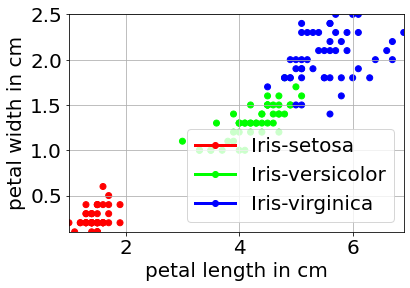

In [33]:
subset=extract_features(data,[0,1])
plot2D(subset)

In [34]:
data_train,data_test=split(subset,test_size=0.2)

Original vector shape:  (150, 2)
Train vector shape:  (120, 2)
Test vector shape:  (30, 2)


In [35]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'output':(3,'linear'),  # number of classes
    'cost':'mse',
})

# activation functions - linear, tanh (-1 to 1), logistic (0 to 1), relu (min 0, linear)

In [36]:
C.fit(data_train.vectors,data_train.targets,epochs=3000)

layer       filters  size              input                output
   0 input                   120 x   1 x   1 x   2   ->   120 x   1 x   1 x   2
   1 connected               120 x   1 x   1 x   2   ->   120 x   3
   2 cost                    120 x   1 x   1 x   3   ->   120 x   1 x   1 x   3


100%|█████████████████████████████████████████████████████████| 3000/3000 [00:02<00:00, 1187.95it/s]


In [37]:
print((C.predict(data_test.vectors)))
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

[2 2 1 2 2 1 2 1 1 1 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2]
('On Training Set:', 35.833333333333336)
('On Test Set:', 26.666666666666668)


In [38]:
C.weights

[array([[ 0.16913905,  0.02427704,  0.20598442],
        [-0.30949634,  0.06903907, -0.02346041]])]

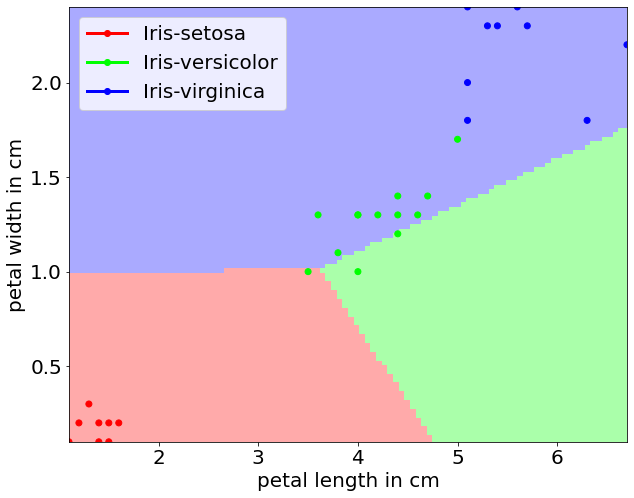

In [17]:
plot2D(data_test,classifier=C)

## Backprop with hidden units

In [18]:
data_train=double_moon_data(d=-2,N=1000)
data_test=double_moon_data(d=-2,N=200)

In [19]:
C=NumPyNetBackProp({
    'input':2,               # number of features
    'hidden':[(15,'logistic'),],
    'output':(2,'logistic'),  # number of classes
    'cost':'mse',
})

In [20]:
C.fit(data_train.vectors,data_train.targets,epochs=6000)

layer       filters  size              input                output
   0 input                  1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2
   1 connected              1000 x   1 x   1 x   2   ->  1000 x  15
   2 connected              1000 x   1 x   1 x  15   ->  1000 x   2
   3 cost                   1000 x   1 x   1 x   2   ->  1000 x   1 x   1 x   2


100%|██████████████████████████████████████████████████████████| 6000/6000 [00:11<00:00, 502.44it/s]


In [21]:
print((C.predict(data_test.vectors)))
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
('On Training Set:', 100.0)
('On Test Set:', 100.0)


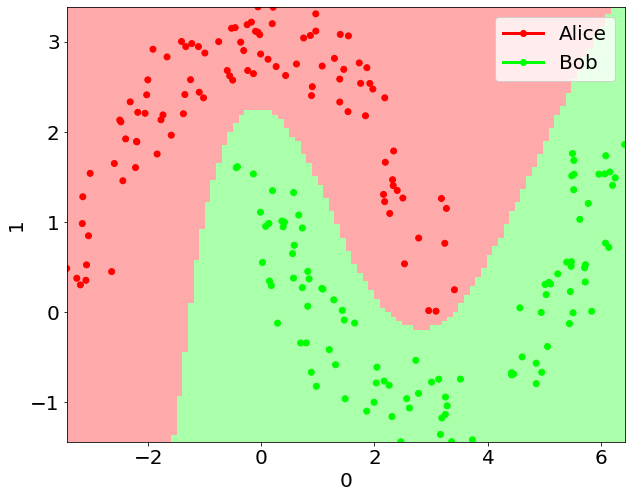

In [22]:
plot2D(data_test,classifier=C)

In [23]:
C.weights

[array([[-1.77193887,  2.08731111,  2.33813294, -0.44579374,  0.81315352,
          2.44804441, -3.62155204, -1.05865624,  1.11806396, -0.96670872,
          1.35180256,  1.43975955,  2.93917632, -3.29510267,  2.47110146],
        [ 1.99761136, -1.52733988,  1.90897719,  1.60156141, -1.81775299,
          2.31870517,  1.43134836,  0.92078068, -1.13513733,  0.90889416,
         -1.30579148, -1.39702778, -0.20445213,  1.01280743,  1.53541888]]),
 array([[ 1.12232923, -0.59901649],
        [-0.80085067,  1.489238  ],
        [ 2.20974766, -2.37649296],
        [-2.22001952,  2.67930469],
        [-1.62520877,  1.20591754],
        [ 2.92608492, -3.32648519],
        [ 2.65153544, -2.98842069],
        [ 1.08807301, -1.20880977],
        [-1.47397163,  1.8114328 ],
        [ 0.72866155, -0.83592777],
        [-2.85142978,  3.15590362],
        [-4.30110036,  3.43579849],
        [-2.51946361,  1.62636504],
        [ 1.90093229, -2.38150504],
        [ 3.84306817, -2.96892127]])]